### 데이터수집

In [201]:
import pandas as pd
import os
import joblib
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import csv

# 경로 설정
DATA_PATH = './Feature Website.csv'
MODEL_DIR = './model'
os.makedirs(MODEL_DIR, exist_ok=True)

def log(title, message):
    print(f"[{title}] {message}")

# 데이터 로드
df = pd.read_csv(DATA_PATH, quoting=csv.QUOTE_NONNUMERIC)
log("INFO", f"데이터 로드 완료: {df.shape}")

# 전처리
X = df['html_code']
y = df['repu']  # 0: benign 정상, 1: malicious 악성

vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

log("REPORT", classification_report(y_test, y_pred))

# 모델 저장
joblib.dump(model, os.path.join(MODEL_DIR, 'rf_model.pkl'))
joblib.dump(vectorizer, os.path.join(MODEL_DIR, 'vectorizer.pkl'))
log("INFO", "모델 저장 완료")


### <b>Q1. 데이터 불러오기</b>
---
- Feature Website.xlsx 데이터 불러오기
- 데이터 둘러보기

In [202]:
import pandas as pd
import csv
#filename ='Feature Website.csv' #피싱사이트정보
#xlrd 지원불가로 openpyxl 사용할 수 있도록 변경
df = pd.read_csv("Feature Website.csv")
df


,html_code,repu
0,<!DOCTYPE html>\n<!--[if lt IE 7]> <html lang=...,malicious
1,\n\t\n\n\n\t\n\n\t\n\n\n\t\n\n\n\t\n\n\t\n\t\t...,malicious
2,"<!DOCTYPE html>\n<html lang=""en"">\n <head>\...",malicious
3,"<!DOCTYPE html><html lang=""en""><head><style da...",malicious
4,<!DOCTYPE html>\n\n\n \n \n \n \n ...,malicious
5,_x000D_\n_x000D_\n_x000D_\n<!DOCTYPE html>_x00...,malicious
6,"<!doctype html>\n\n<html data-ytrk-page=""HOME""...",malicious
7,"\n\t<!DOCTYPE html>\n\t<html class=""no-icon-fo...",malicious
8,"<!DOCTYPE html>\n<html class=""no-js"">\n<head>\...",malicious
9,"<!DOCTYPE html>\n<html class=""b-header--bl...",malicious


### <b>Q2. html 에서 \<script>...\</script> 길이 계산</b>
---
- BeautifulSoup으로 html소스를 python 객체로 변환
- 함수로 구현하기
- float으로 return 받기

In [203]:
#html 공백수 카운트 함수
def html_script_characters(soup):
    # soup > script
    html_len = str(soup.script)
    return float(len(html_len.replace(' ', '')))

In [204]:
from bs4 import BeautifulSoup
script_len = []

for index, row in df.iterrows():
    soup = BeautifulSoup(row.html_code, 'html.parser')
    script_len.append(html_script_characters(soup))

df['html_script_characters'] = script_len

### <b>Q3. html에서 공백 수 계산</b>
---
- BeautifulSoup으로 html소스를 python 객체로 변환
- 함수로 구현하기
- float으로 return 받기

In [205]:
def html_num_whitespace(soup):
    try:
        # soup > body > text > count
        NullCount = soup.body.text.count(' ')
        return float(NullCount)
    except:
        return 0.0

In [206]:
num_whitespace = []

for index, row in df.iterrows():
    soup = BeautifulSoup(row.html_code, 'html.parser')
    num_whitespace.append(html_num_whitespace(soup))

df['html_num_whitespace'] = num_whitespace

### <b>Q4. html 에서 body 길이 계산</b>
---
- BeautifulSoup으로 html소스를 python 객체로 변환
- 함수로 구현하기
- float으로 return 받기

In [207]:
def html_num_characters(soup):
    try:
        #soup > body > text
        bodyLen = len(      )
        return float(bodyLen)
    except:
        return 0.0

In [208]:
html_body = []

for index, row in df.iterrows():
    soup = BeautifulSoup(row.html_code, 'html.parser')
    html_body.append(html_num_characters(soup))

df['html_body_len'] = html_body

In [209]:
df.describe()

,html_script_characters,html_num_whitespace,html_body_len
count,40.000000,40.00000,40.0
mean,886.700000,307.65000,0.0
std,1767.449694,900.94536,0.0
min,4.000000,0.00000,0.0
25%,109.750000,0.00000,0.0
50%,246.000000,6.00000,0.0
75%,633.500000,125.25000,0.0
max,8871.000000,4166.00000,0.0


### <b> Q5. script 에서 src, href 속성을 가진 태그수</b>
1. BeautifulSoup으로 html소스를 python 객체로 변환
2. 함수로 구현하기
3. float으로 return 받기

In [210]:
def html_link_in_script(soup):
    numOfLinks = len(soup.findAll('script', {"src": True}))
    numOfLinks += len(soup.findAll('script', {"href": True}))
    return float(numOfLinks)

In [211]:
html_script_link_num = []

for index, row in df.iterrows():
    soup = BeautifulSoup(row.html_code, 'html.parser')
    html_script_link_num.append(html_link_in_script(soup))

df['html_script_link_num'] = html_script_link_num

### 데이터 전처리

### <b>Q1. 중복 데이터 제거</b>
---
 - 중복된 행데이터 삭제

In [212]:
train_df = pd.read_csv('TrainData.csv',delimiter=',')

In [213]:
train_df.info()

In [214]:
train_df.columns

Index(['Unnamed: 0', 'url_len', 'url_num_hyphens_dom', 'url_num_dom_token',
       'url_path_len', 'url_filename_len', 'url_longest_dom_token_len',
       'url_average_dom_token_len', 'url_tld', 'url_domain_len',
       'url_hostname_len', 'url_num_dots', 'url_num_underscores',
       'url_num_equals', 'url_num_slashes', 'url_num_dash',
       'url_num_semicolon', 'url_num_at', 'url_num_percent', 'url_num_plus',
       'url_query_len', 'url_num_query_para', 'url_ip_present', 'url_entropy',
       'url_count_consonants', 'url_num_digits', 'url_chinese_present',
       'url_port', 'html_num_tags('iframe')', 'html_num_tags('script')',
       'html_num_tags('embed')', 'html_num_tags('object')',
       'html_num_tags('div')', 'html_num_tags('head')',
       'html_num_tags('body')', 'html_num_tags('form')', 'html_num_tags('a')',
       'html_num_tags('small')', 'html_num_tags('span')',
       'html_num_tags('input')', 'html_num_tags('applet')',
       'html_num_tags('img')', 'html_num_tags('

In [215]:
# 중복 데이터 제거 : drop_duplicates()
train_df=train_df.drop_duplicates()

In [216]:
train_df.info()

#### <b>텍스트와 범주형 특성 처리 실습</b>
---

In [217]:
# unique() 유일한 값 확인
train_df['Result_v1'].unique()

array(['benign', 'malicious'], dtype=object)

In [218]:
# replace() 함수 사용
# 'benign'=1,'malicious'=-1 처리
train_df['Result_v1'].replace({'benign':1,'malicious':-1}, inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_2524\2602206954.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Result_v1'].replace({'benign':1,'malicious':-1}, inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_2524\2602206954.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train

In [219]:
train_df['Result_v1'].unique()

array([ 1, -1], dtype=int64)

In [220]:
train_df.columns

Index(['Unnamed: 0', 'url_len', 'url_num_hyphens_dom', 'url_num_dom_token',
       'url_path_len', 'url_filename_len', 'url_longest_dom_token_len',
       'url_average_dom_token_len', 'url_tld', 'url_domain_len',
       'url_hostname_len', 'url_num_dots', 'url_num_underscores',
       'url_num_equals', 'url_num_slashes', 'url_num_dash',
       'url_num_semicolon', 'url_num_at', 'url_num_percent', 'url_num_plus',
       'url_query_len', 'url_num_query_para', 'url_ip_present', 'url_entropy',
       'url_count_consonants', 'url_num_digits', 'url_chinese_present',
       'url_port', 'html_num_tags('iframe')', 'html_num_tags('script')',
       'html_num_tags('embed')', 'html_num_tags('object')',
       'html_num_tags('div')', 'html_num_tags('head')',
       'html_num_tags('body')', 'html_num_tags('form')', 'html_num_tags('a')',
       'html_num_tags('small')', 'html_num_tags('span')',
       'html_num_tags('input')', 'html_num_tags('applet')',
       'html_num_tags('img')', 'html_num_tags('

### <b>Q3. 결측치 제거</b>
---

In [221]:
train_df.info()

In [222]:
# 결측치 제거
# dropna()

train_df = train_df.dropna(axis=0)

In [223]:
train_df.info()

### <b>Q4. 데이터 탐색을 통한 불필요한 칼럼 제거</b>
---
- ex) 그래프, 데이터 상관관계 corr()등 활용
- corr() 메서드 : 모든 특성 간의 표준 상관계수(피어슨의 R)
  - 확률론과 통계학에서 두 변수간에 어떤 선형적 또는 비선형적 관계를 갖고 있는지를 분석하는 방법
  - r 값은 X 와 Y 가 완전히 동일하면 +1, 전혀 다르면 0, 반대방향으로 완전히 동일 하면 –1 
- scatter 그래프를 활용한 데이터 분석

In [224]:
train_df.drop(columns=["Unnamed: 0"],inplace=True)

In [225]:
train_df.corr()

,url_len,url_num_hyphens_dom,url_num_dom_token,url_path_len,url_filename_len,url_longest_dom_token_len,url_average_dom_token_len,url_tld,url_domain_len,url_hostname_len,...,html_num_tags('form'),html_num_tags('a'),html_num_tags('small'),html_num_tags('span'),html_num_tags('input'),html_num_tags('applet'),html_num_tags('img'),html_num_tags('video'),html_num_tags('audio'),Result_v1
url_len,1.000000,-0.021590,0.003813,0.925826,0.847399,0.008996,-0.006231,0.065051,0.018871,0.019715,...,-0.023082,-0.023669,-0.009227,-0.009228,-0.020522,NaN,-0.027907,-0.031514,-0.009059,-0.016564
url_num_hyphens_dom,-0.021590,1.000000,-0.110107,-0.100584,-0.059089,0.674715,0.658653,0.140738,0.599516,0.600409,...,0.055574,-0.038931,-0.020845,-0.021775,0.128894,NaN,-0.002138,-0.026647,-0.004638,-0.363948
url_num_dom_token,0.003813,-0.110107,1.000000,-0.004779,0.020256,-0.199791,-0.381486,-0.310944,0.244571,0.236772,...,-0.099625,0.019123,-0.011347,0.005144,-0.056162,NaN,0.019001,-0.028614,-0.008123,0.263194
url_path_len,0.925826,-0.100584,-0.004779,1.000000,0.919136,-0.103884,-0.117880,0.034509,-0.114367,-0.113648,...,-0.031817,-0.012026,-0.003277,-0.002613,-0.046493,NaN,-0.013834,-0.027699,-0.007481,0.093370
url_filename_len,0.847399,-0.059089,0.020256,0.919136,1.000000,-0.063097,-0.077263,0.017312,-0.062970,-0.063120,...,-0.038819,-0.005379,-0.000835,-0.000736,-0.036296,NaN,-0.004382,-0.016023,-0.011768,0.115191
url_longest_dom_token_len,0.008996,0.674715,-0.199791,-0.103884,-0.063097,1.000000,0.943278,0.276790,0.858700,0.860612,...,0.065525,-0.056702,-0.022140,-0.030995,0.136603,NaN,-0.057497,-0.011989,-0.007122,-0.517172
url_average_dom_token_len,-0.006231,0.658653,-0.381486,-0.117880,-0.077263,0.943278,1.000000,0.290714,0.764368,0.766973,...,0.085827,-0.054155,-0.023238,-0.030013,0.148569,NaN,-0.042696,-0.007847,-0.004567,-0.539803
url_tld,0.065051,0.140738,-0.310944,0.034509,0.017312,0.276790,0.290714,1.000000,0.175183,0.188197,...,0.074663,0.021812,0.014698,0.015765,0.073766,NaN,0.004393,-0.016168,-0.005388,-0.206721
url_domain_len,0.018871,0.599516,0.244571,-0.114367,-0.062970,0.858700,0.764368,0.175183,1.000000,0.999061,...,0.028735,-0.037998,-0.027312,-0.024793,0.121214,NaN,-0.022369,-0.022319,-0.003479,-0.383350
url_hostname_len,0.019715,0.600409,0.236772,-0.113648,-0.063120,0.860612,0.766973,0.188197,0.999061,1.000000,...,0.031507,-0.036968,-0.026903,-0.024246,0.122813,NaN,-0.021090,-0.022212,-0.004195,-0.386960


In [226]:
train_df.corr()['Result_v1'].sort_values(ascending=False)

Result_v1                    1.000000
url_num_dom_token            0.263194
html_num_tags('script')      0.206241
html_num_tags('img')         0.149920
html_num_tags('a')           0.123462
url_num_percent              0.118113
url_filename_len             0.115191
url_num_underscores          0.114241
html_num_tags('embed')       0.108915
html_num_tags('object')      0.107646
url_path_len                 0.093370
url_ip_present               0.083675
url_num_digits               0.077009
html_num_tags('div')         0.066817
html_num_tags('span')        0.056352
url_num_dots                 0.049225
html_num_tags('iframe')      0.031671
html_num_tags('small')       0.022100
url_port                     0.012192
html_num_tags('audio')       0.009203
html_num_tags('video')       0.001736
url_num_plus                -0.002219
url_len                     -0.016564
html_num_tags('head')       -0.035663
url_num_semicolon           -0.060768
url_num_at                  -0.072670
html_num_tag

#### <b>scatter 그래프를 활용한 데이터 분석 실습</b>
---

In [227]:
import matplotlib.pyplot as plt

In [228]:
# 1 = 'blue',-1 = 'red' 처리
train_df['color'] = train_df['Result_v1'].map({1:"blue", -1:"red"})

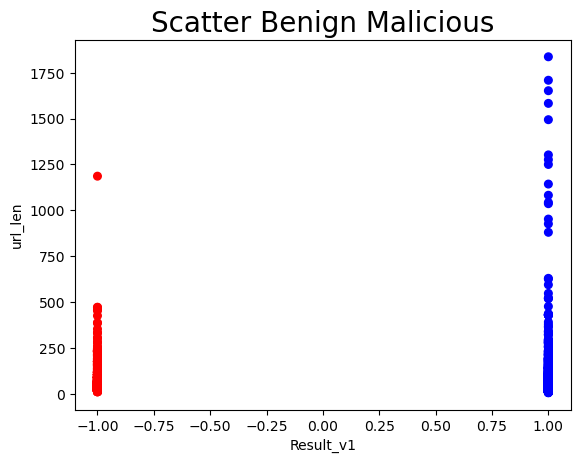

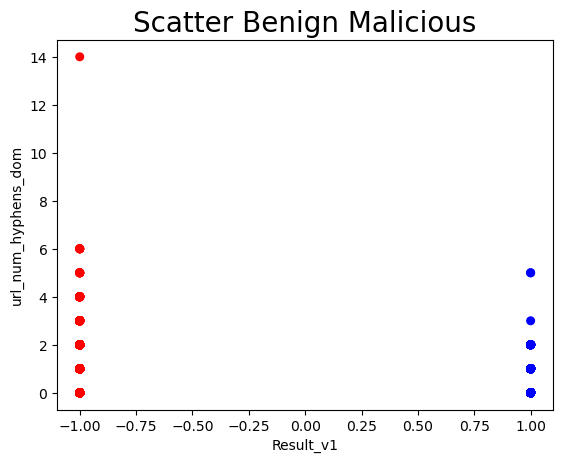

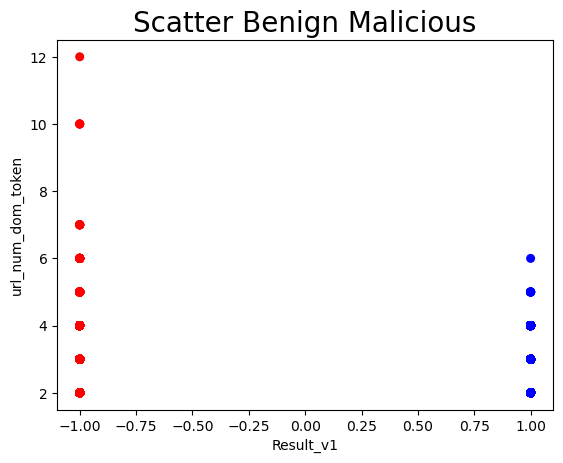

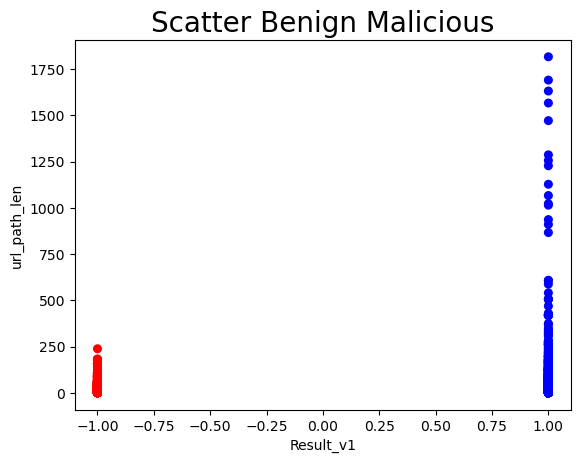

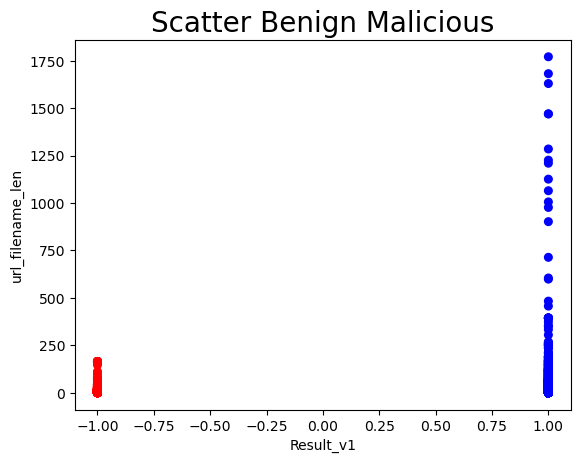

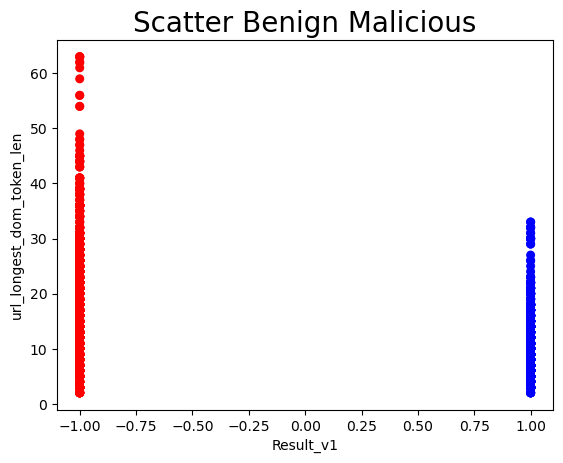

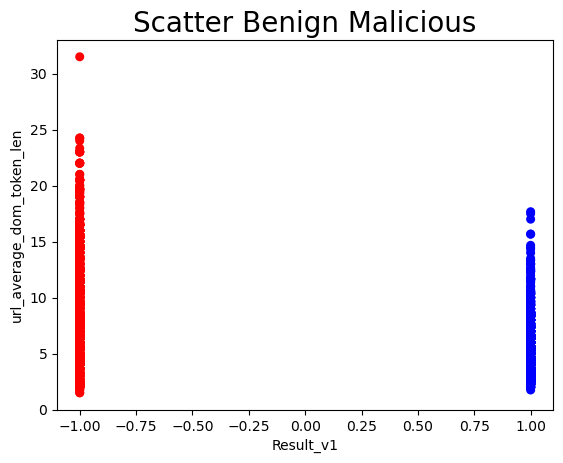

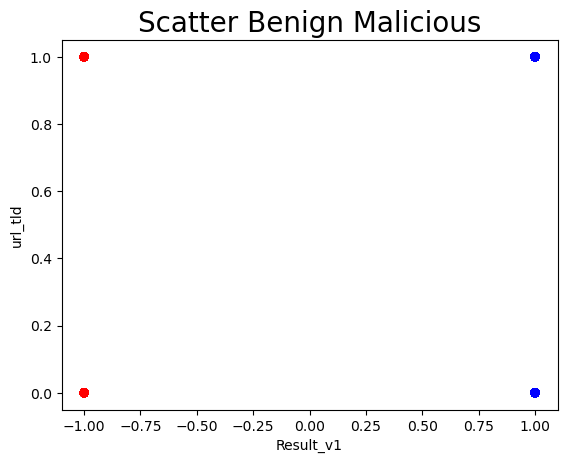

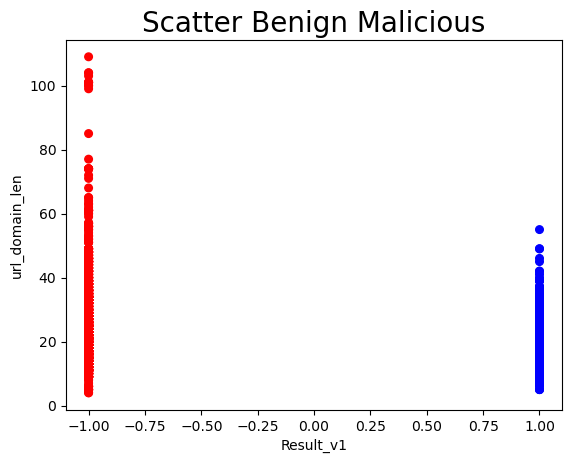

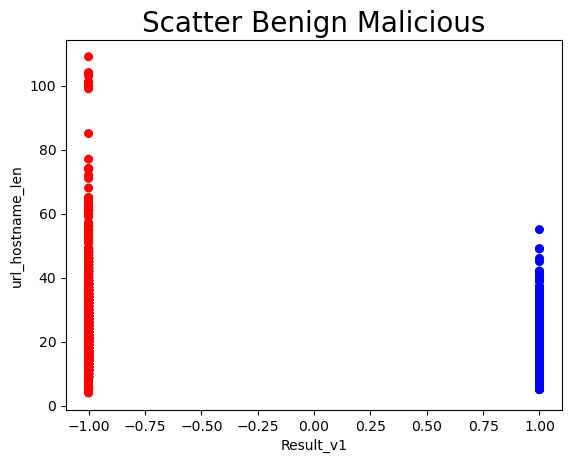

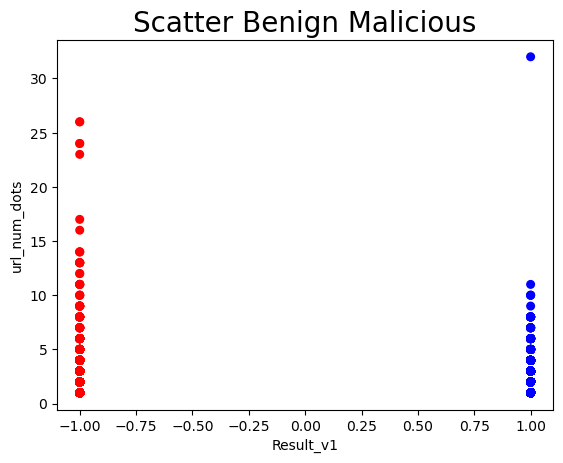

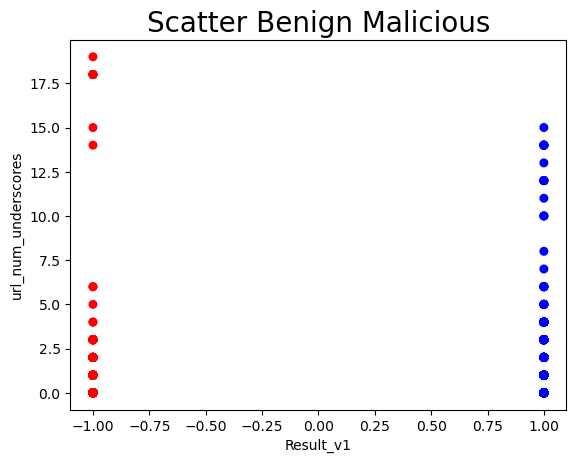

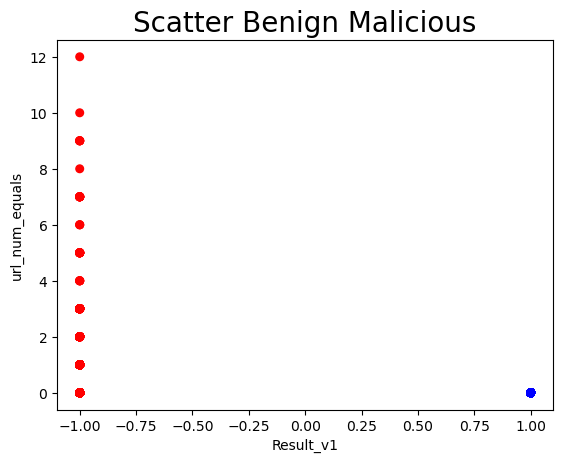

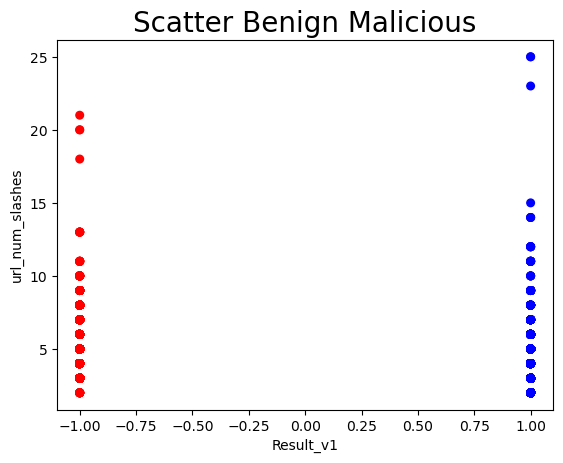

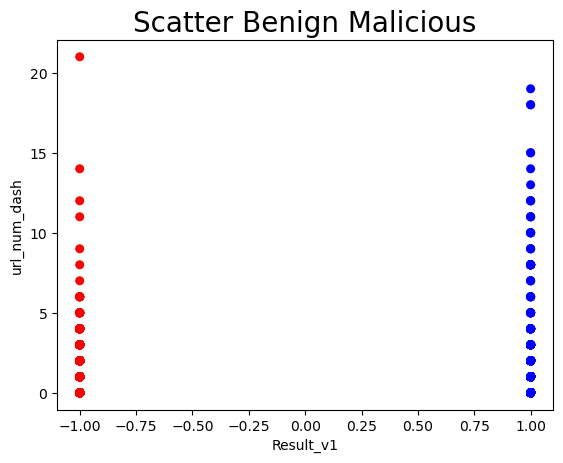

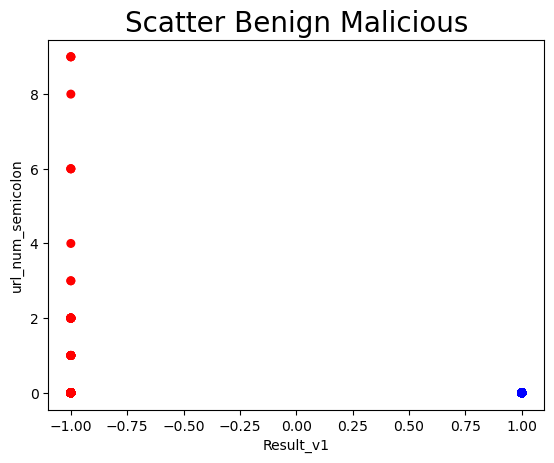

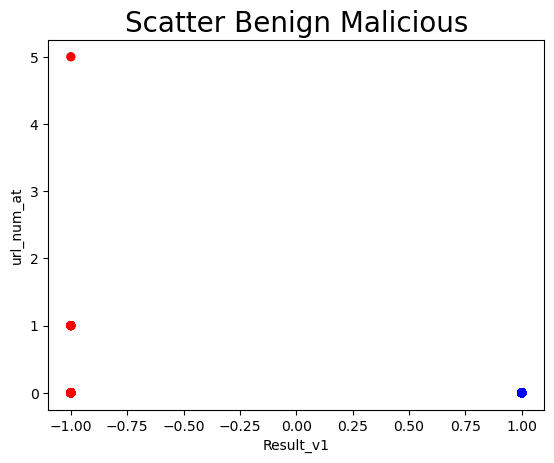

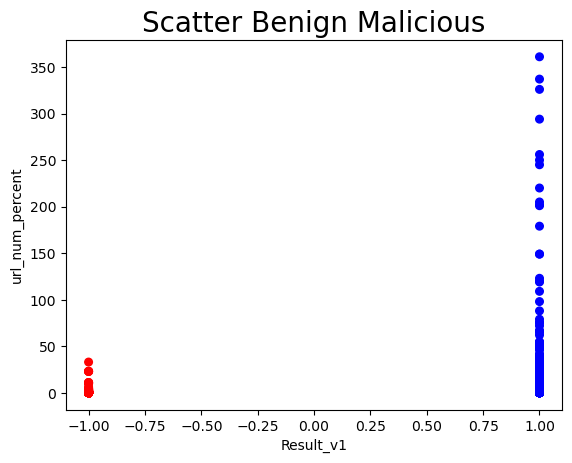

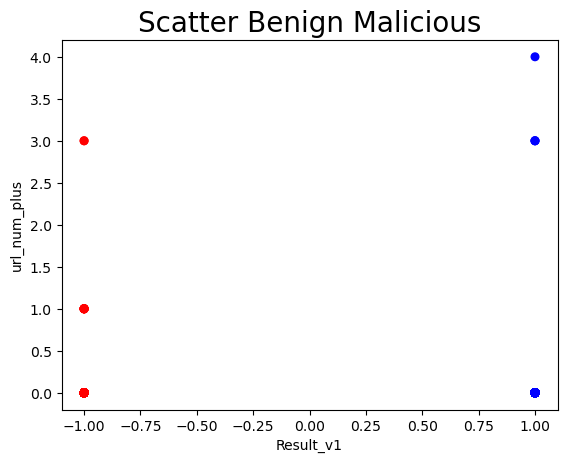

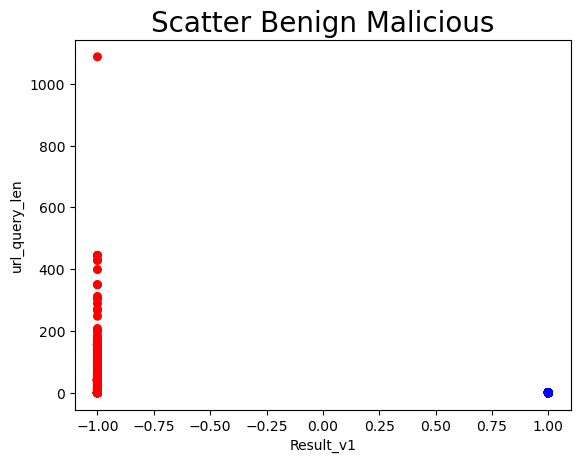

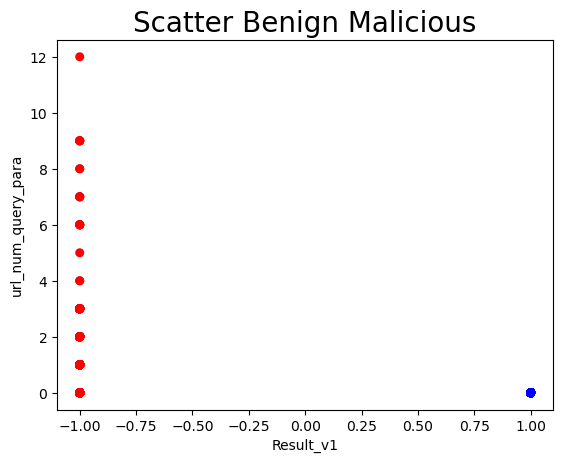

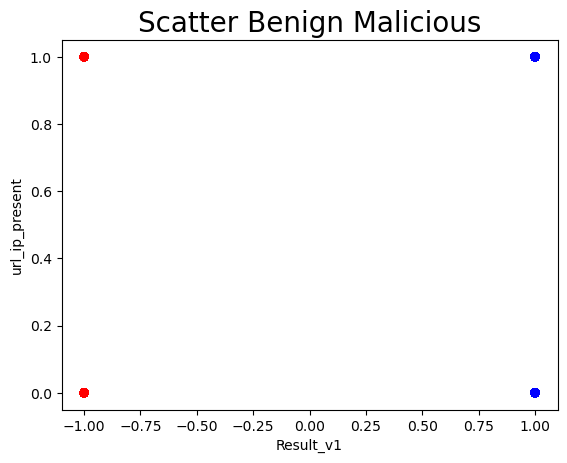

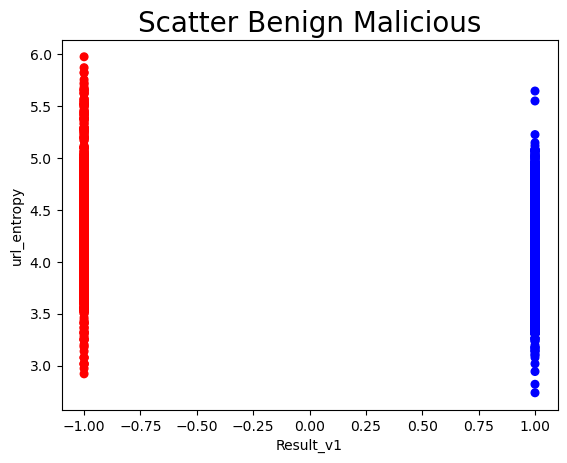

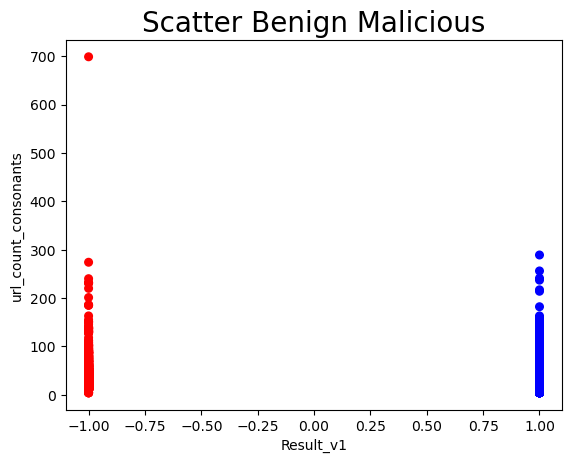

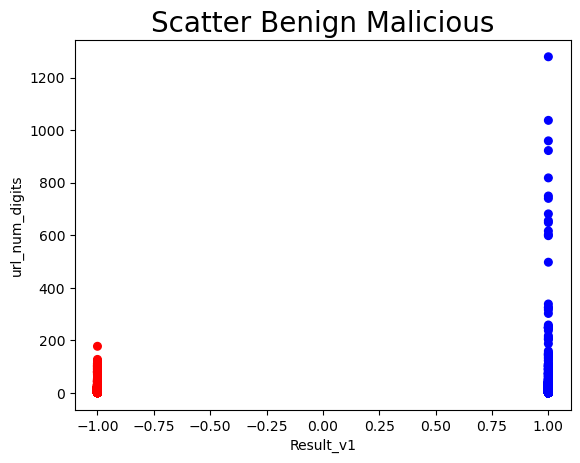

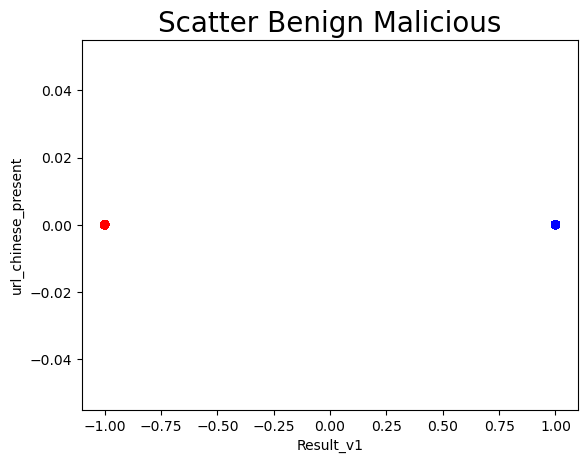

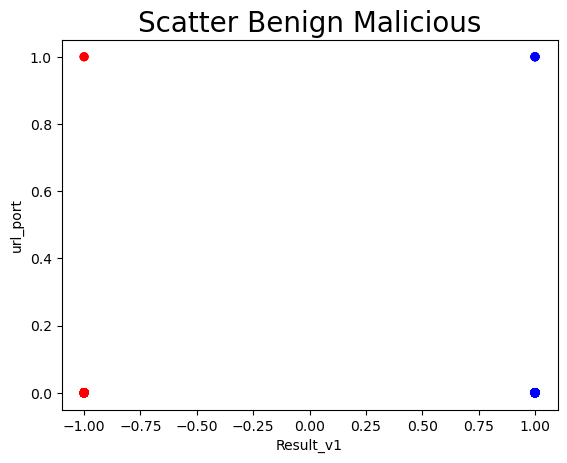

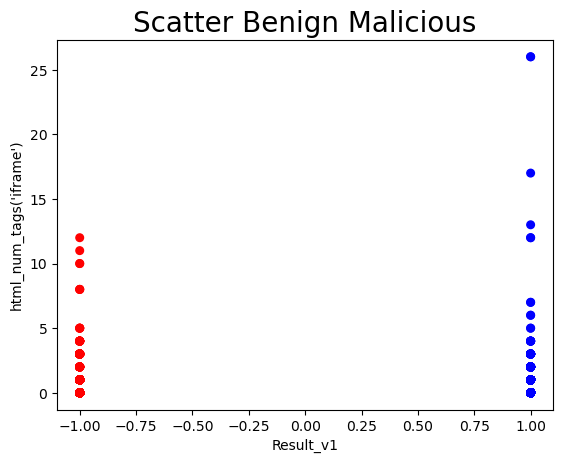

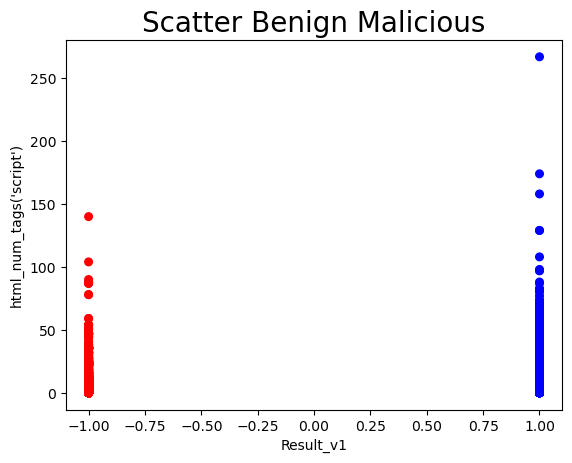

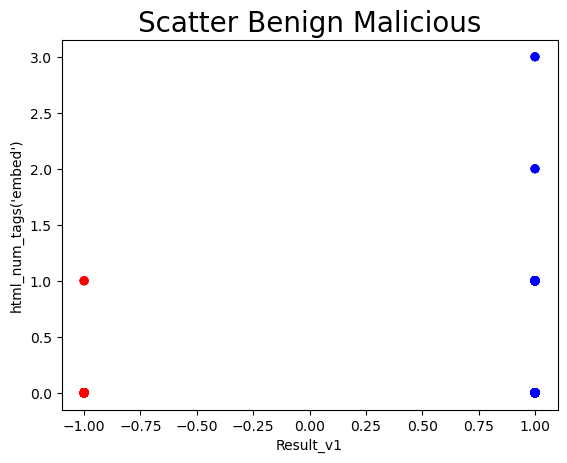

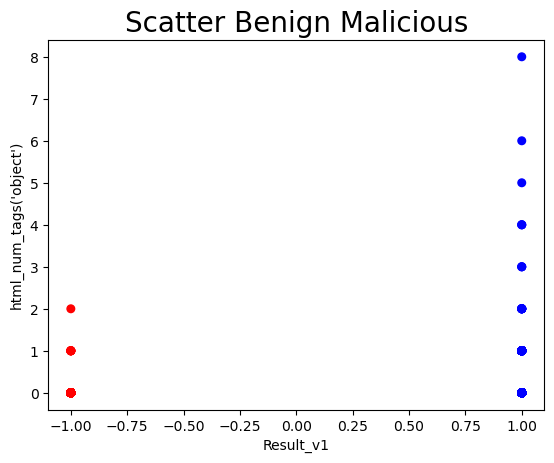

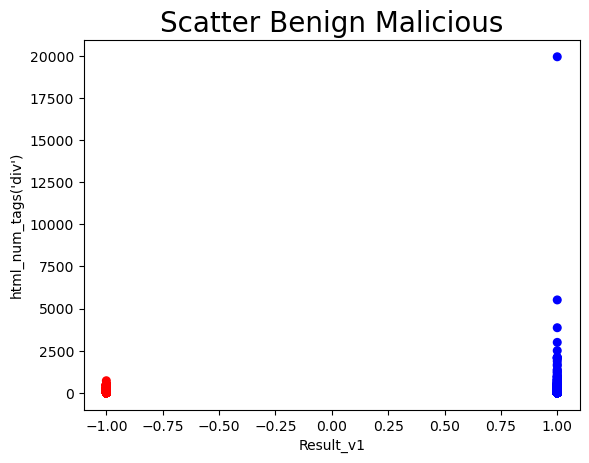

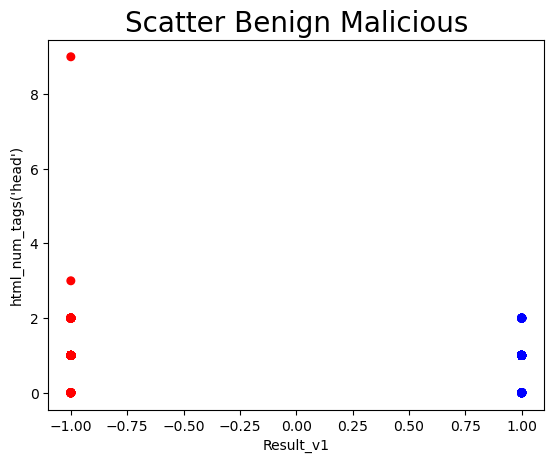

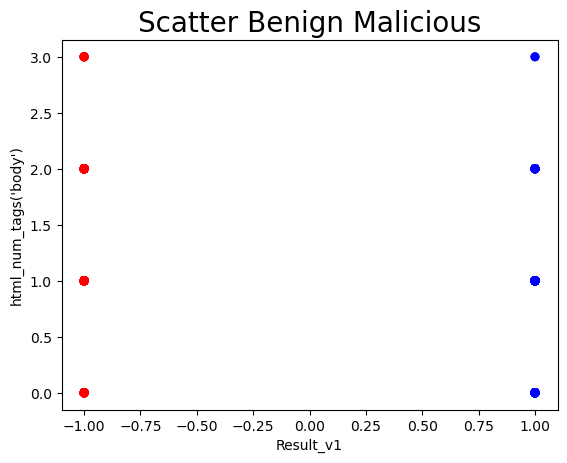

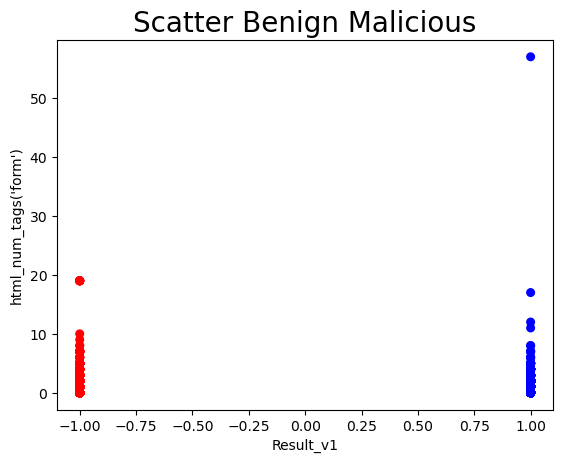

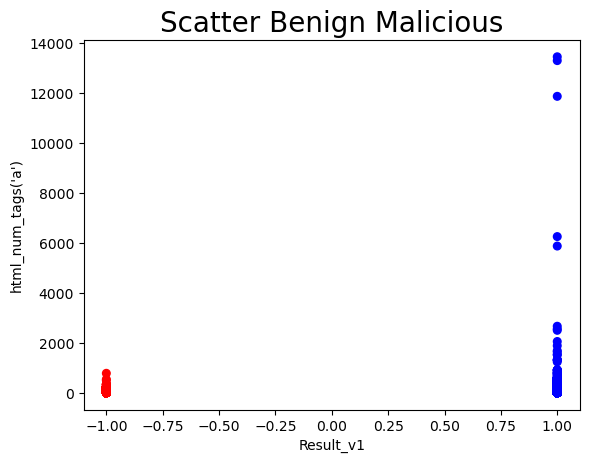

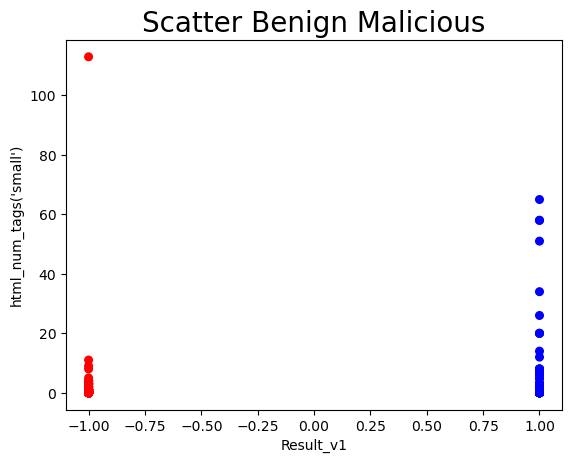

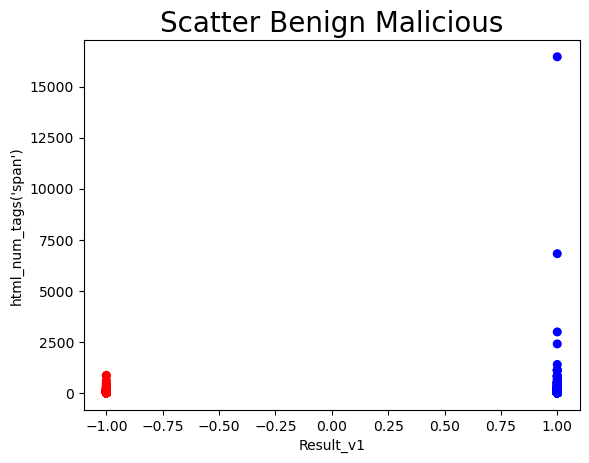

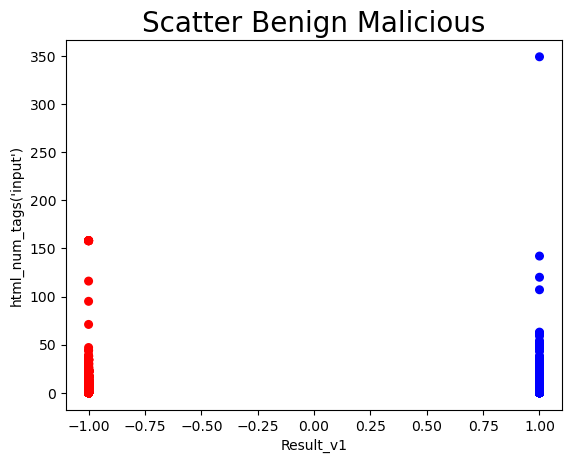

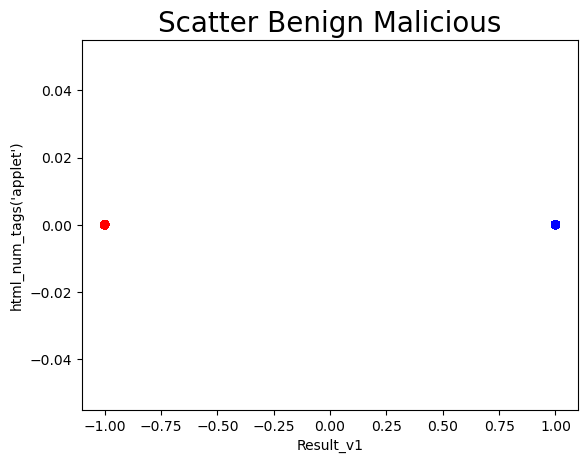

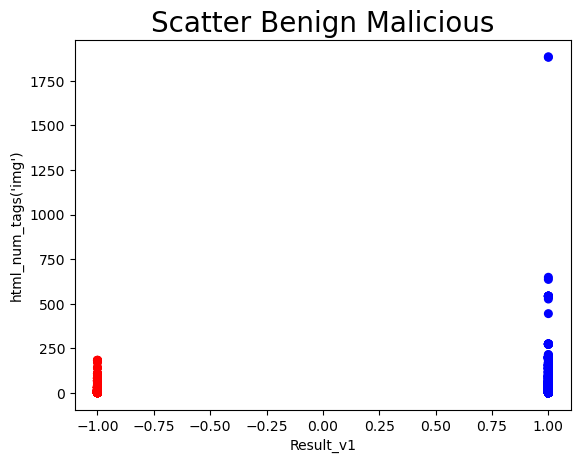

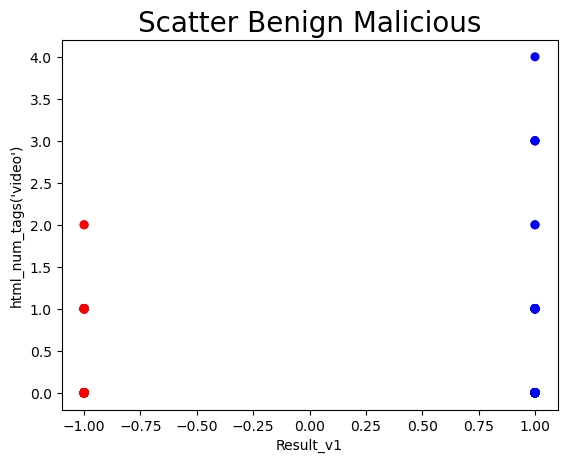

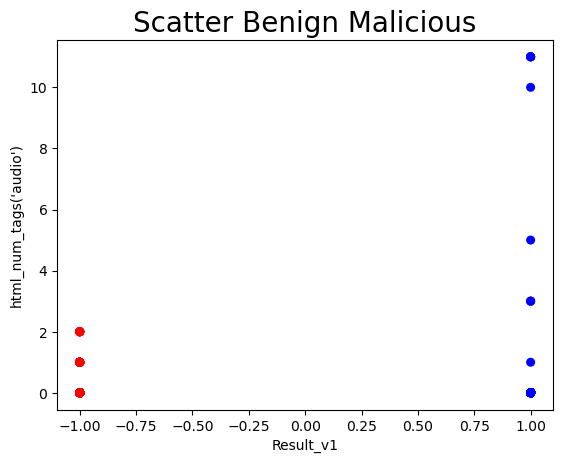

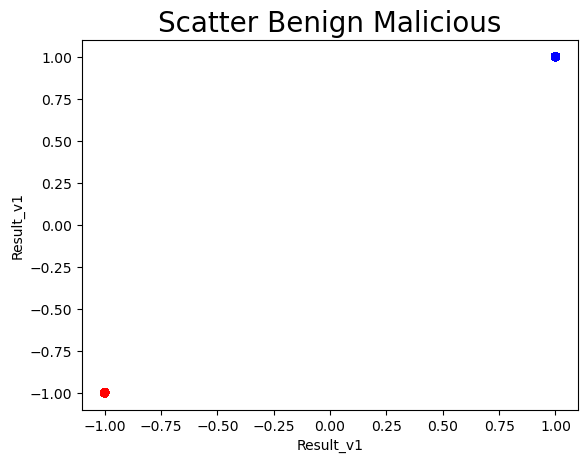

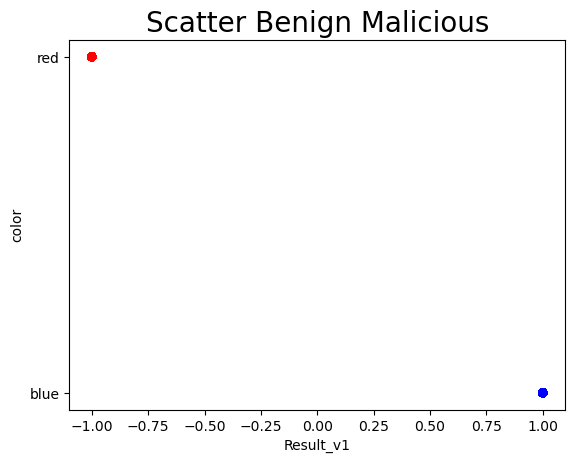

In [229]:
y_list = train_df.columns

for i in range(0, len(y_list)):
    train_df.plot(kind='scatter',x='Result_v1',y=y_list[i],s=30, c=train_df['color'])
    plt.title('Scatter Benign Malicious', fontsize=20)
    plt.xlabel('Result_v1')
    plt.ylabel(y_list[i])
    plt.show()

#### <b>불필요한 컬럼 제거</b>
---

In [230]:
train_df.drop(columns=["url_chinese_present","html_num_tags('applet')","color"],inplace=True)

In [231]:
train_df.info()

## Q5. train_test_split을 이용하여, train_x, val_x, train_y, val_y로 데이터 분리
---

- test_size = 0.3
- random_state = 2021

In [232]:
from sklearn.model_selection import train_test_split

In [233]:
X = train_df.iloc[:,0:len(train_df.columns)-1].values
y = train_df.iloc[:,len(train_df.columns)-1].values

In [234]:
# train_test_split 사용
train_x, val_x, train_y, val_y = train_test_split(X, y,test_size=0.3,random_state=2021) 

In [235]:
train_x.shape, val_x.shape, train_y.shape, val_y.shape

((4269, 41), (1830, 41), (4269,), (1830,))

### AI모델링

In [236]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

### <b>Confusion Matrix 함수 정의</b>
---

- Confusion Matrix란?
 - Training 을 통한 Prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표
 - 참고 사이트 : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
 
 


In [237]:
from sklearn.metrics import classification_report as creport
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [238]:
def plot_confusion_matrix(ax, matrix, labels = ['malicious','benign'], title='Confusion matrix', fontsize=9):
    ax.set_xticks([x for x in range(len(labels))])
    ax.set_yticks([y for y in range(len(labels))])

    # Place labels on minor ticks
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_xticklabels(labels, rotation='90', fontsize=fontsize, minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    # Hide major tick labels
    ax.tick_params(which='major', labelbottom='off', labelleft='off')

    # Finally, hide minor tick marks
    ax.tick_params(which='minor', width=0)

    # Plot heat map
    proportions = [1. * row / sum(row) for row in matrix]
    ax.pcolor(np.array(proportions[::-1]), cmap=plt.cm.Blues)

    # Plot counts as text
    for row in range(len(matrix)):
        for col in range(len(matrix[row])):
            confusion = matrix[::-1][row][col]
            if confusion != 0:
                ax.text(col + 0.5, row + 0.5, int(confusion),
                        fontsize=fontsize,
                        horizontalalignment='center',
                        verticalalignment='center')

    # Add finishing touches
    ax.grid(True, linestyle=':')
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('prediction', fontsize=fontsize)
    ax.set_ylabel('actual', fontsize=fontsize)

    plt.show()

### <b> Q2. DecisonTree 모델

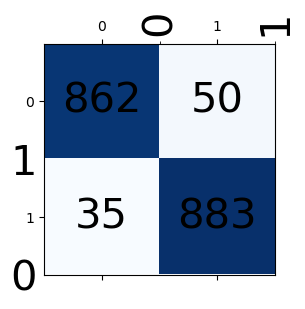

In [239]:
# 1. import
from sklearn.tree import DecisionTreeClassifier
# 2.선언
dtc = DecisionTreeClassifier()

# 3. fit()
dtc.fit(train_x,train_y)

# 3. predict()
dtc_pred = dtc.predict(val_x)

# train 및 val 데이터 정확도 확인 : score()
dtc.score(train_x, train_y), dtc.score(val_x, val_y)

#Confusion Matrix 확인
confusion = confusion_matrix(val_y, dtc_pred)
fig, ax = plt.subplots(figsize=(10,3))

def plot_confusion_matrix(ax, cm, fontsize=14):
    labels = [str(i) for i in range(len(cm))]

    ax.matshow(cm, cmap='Blues')

    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, f'{val}', ha='center', va='center', fontsize=fontsize)

    # 축 위치 설정
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)

    # ✅ rotation 값을 숫자로!
    ax.set_xticklabels(labels, rotation=90, fontsize=fontsize, minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    ax.tick_params(which="minor", bottom=False, left=False)
plot_confusion_matrix(ax, confusion, fontsize=30)





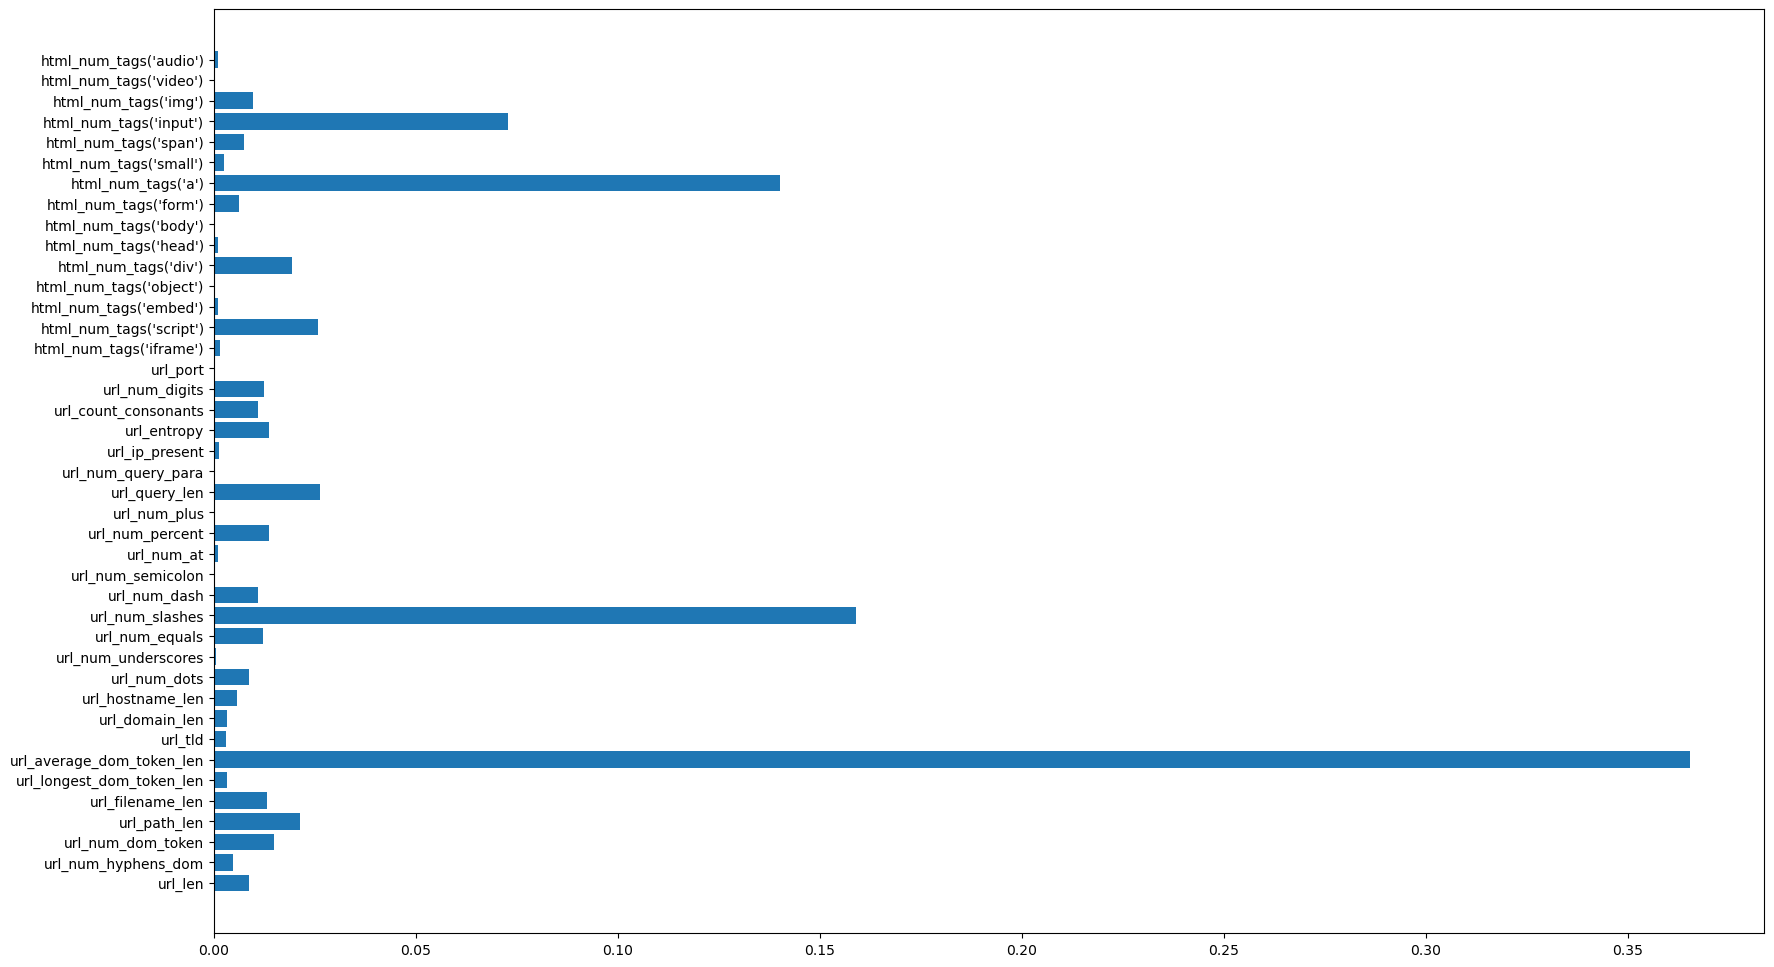

In [240]:
plt.figure(figsize=(20,12))
plt.barh(y=train_df.columns[:-1],
        width = dtc.feature_importances_)
plt.show()

### <b>앙상블(Ensemble)</b>

## Q3. Random Forest 모델

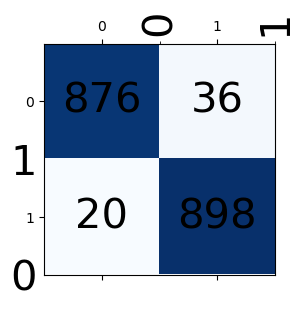

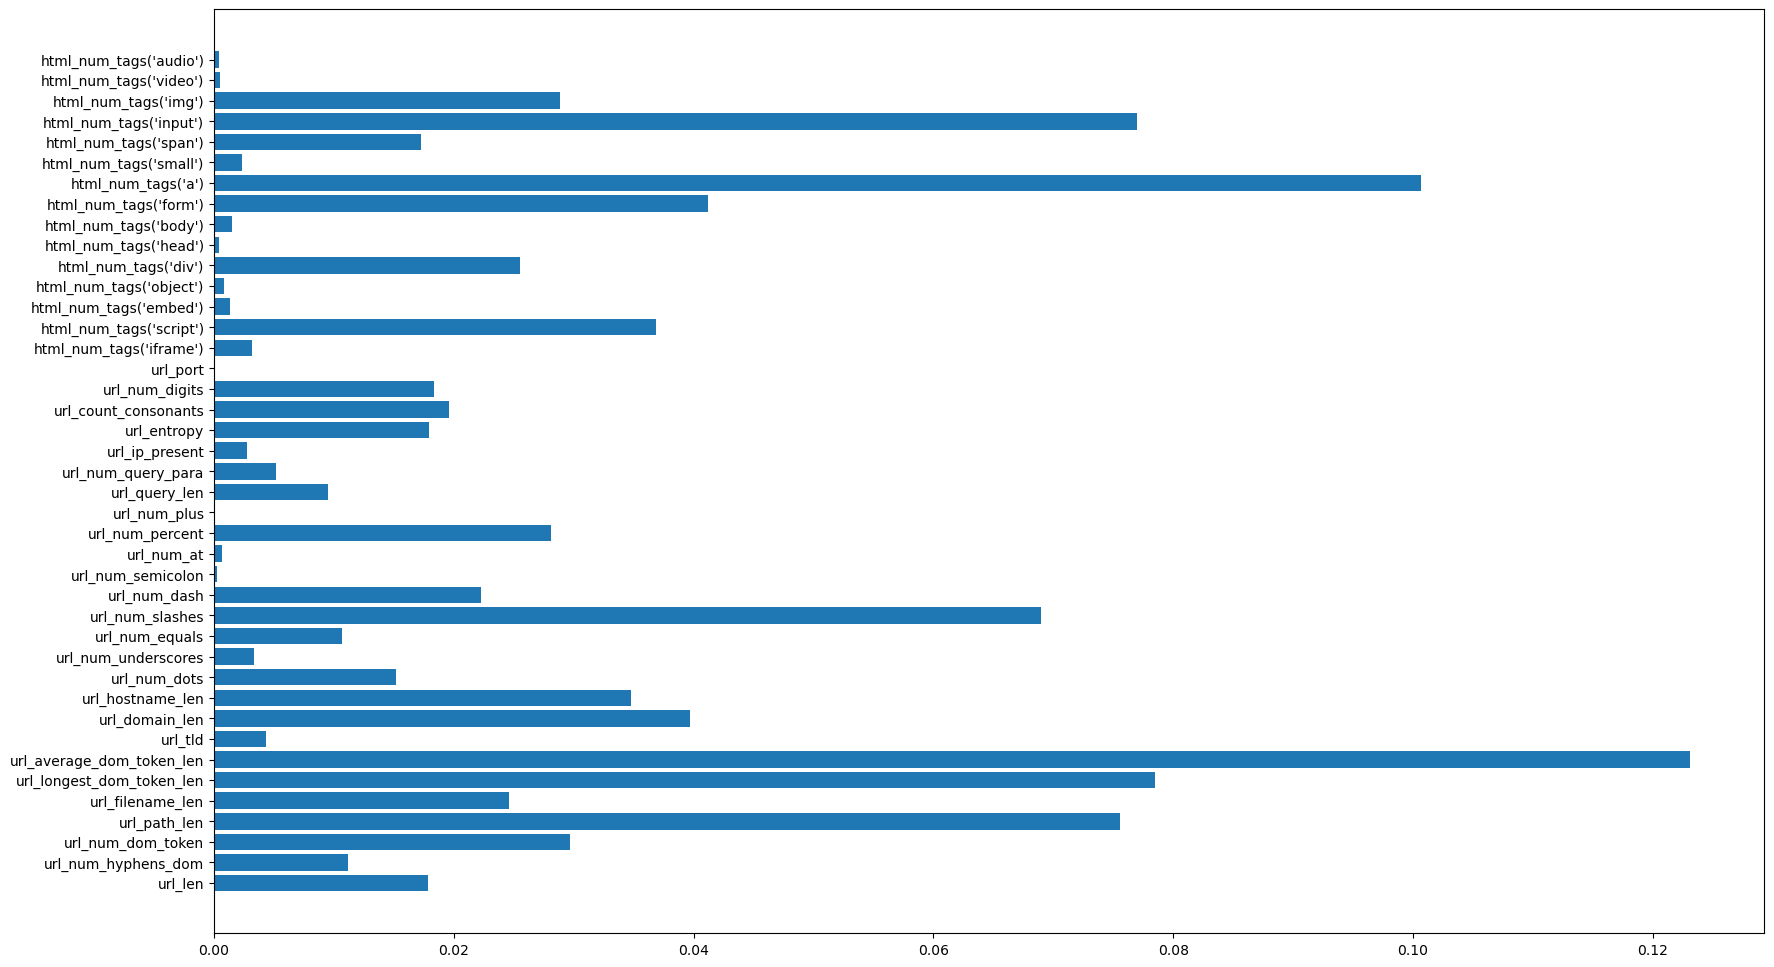

In [241]:
# 1. import
from sklearn.ensemble import RandomForestClassifier
# 2.선언
rfc = RandomForestClassifier()

# 3. fit()
rfc.fit(train_x,train_y)

# 3. predict()
rfc_pred = rfc.predict(val_x)

# train 및 val 데이터 정확도 확인 :score()
rfc.score(train_x,train_y), rfc.score(val_x, val_y)

# Confusion Matrix 확인
confusion = confusion_matrix(val_y, rfc_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

# feature_importances_ 활용 Feature별 가중치 확인
plt.figure(figsize=(20,12))
plt.barh(y=train_df.columns[:-1],
        width = rfc.feature_importances_)
plt.show()

### <b> Q4. AdaBoost 모델

c:\Users\user\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


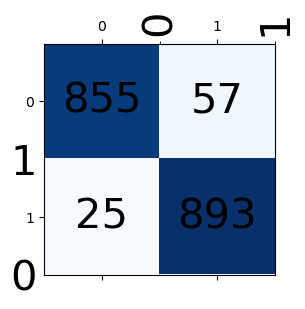

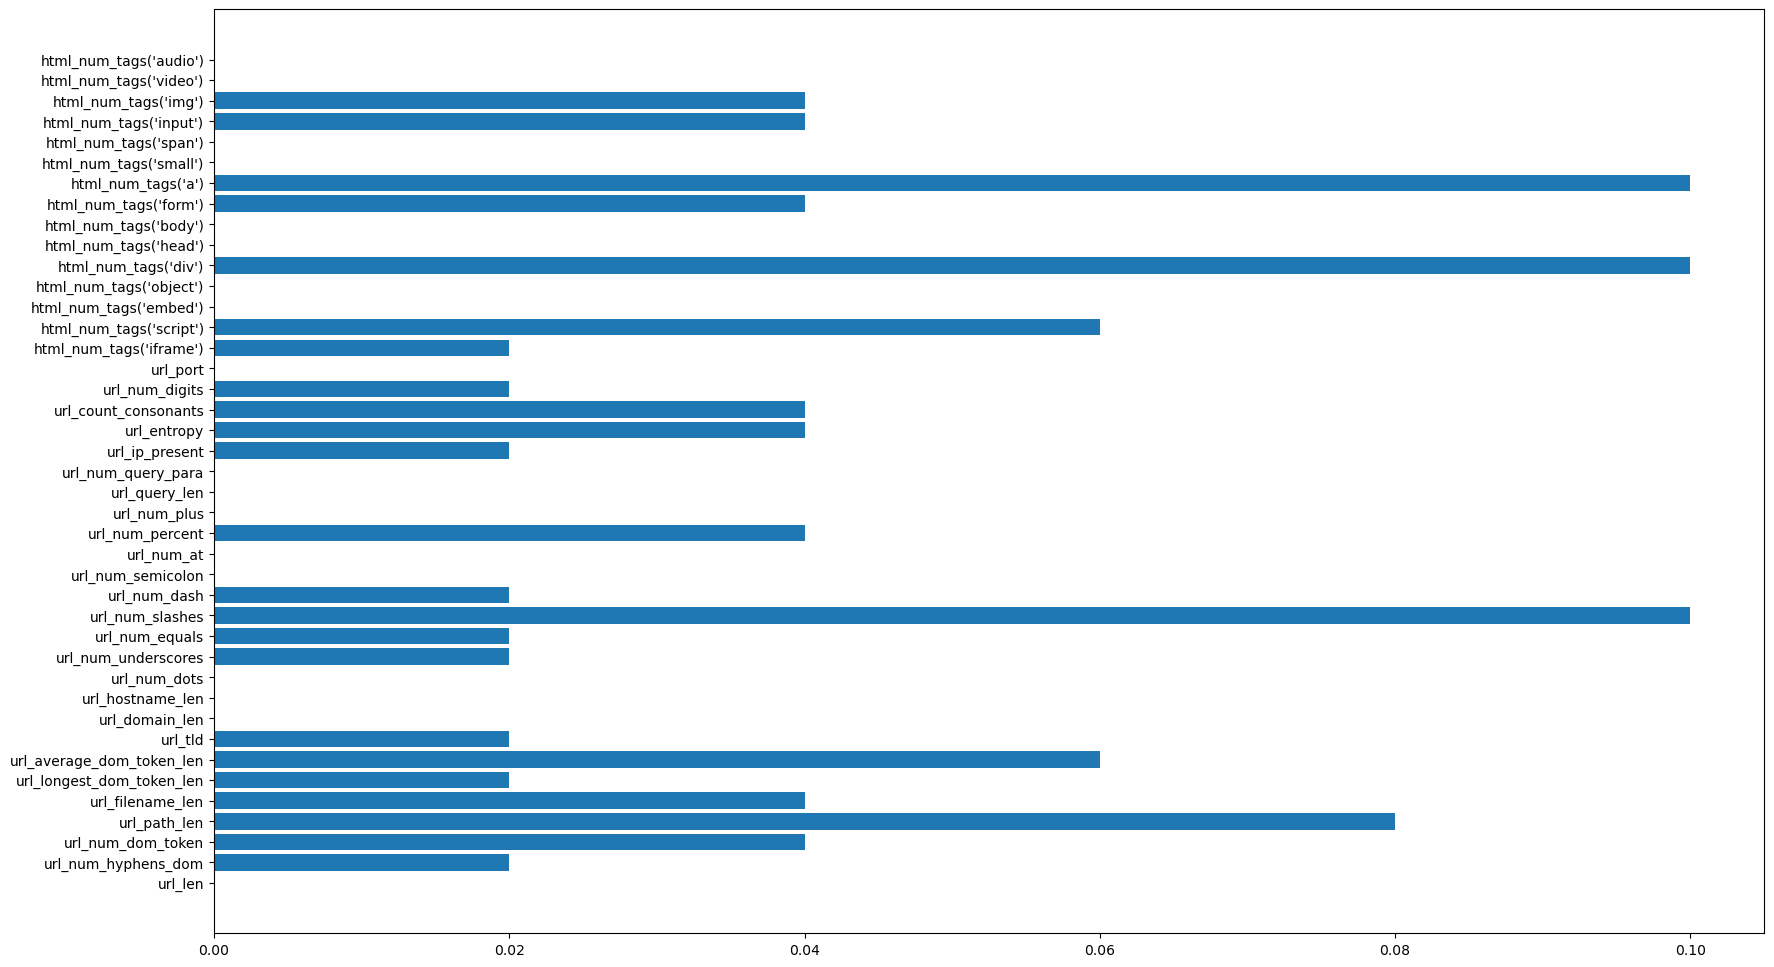

In [242]:
# 1. import
from sklearn.ensemble import AdaBoostClassifier
# 2.선언
abc = AdaBoostClassifier()
# 3. fit()
abc.fit(train_x,train_y)
# 3. predict()
abc_pred = abc.predict(val_x)
# train 및 val 데이터 정확도 확인 : score()
abc.score(train_x, train_y), abc.score(val_x, val_y)
#Confusion Matrix 확인
confusion = confusion_matrix(val_y, abc_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)
# feature_importances_ 활용 Feature별 가중치 확인
plt.figure(figsize=(20,12))
plt.barh(y=train_df.columns[:-1],
        width = abc.feature_importances_)
plt.show()

### <b> Q5. Gradient Boost 모델

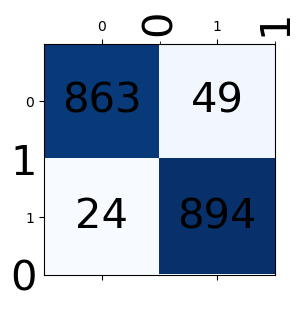

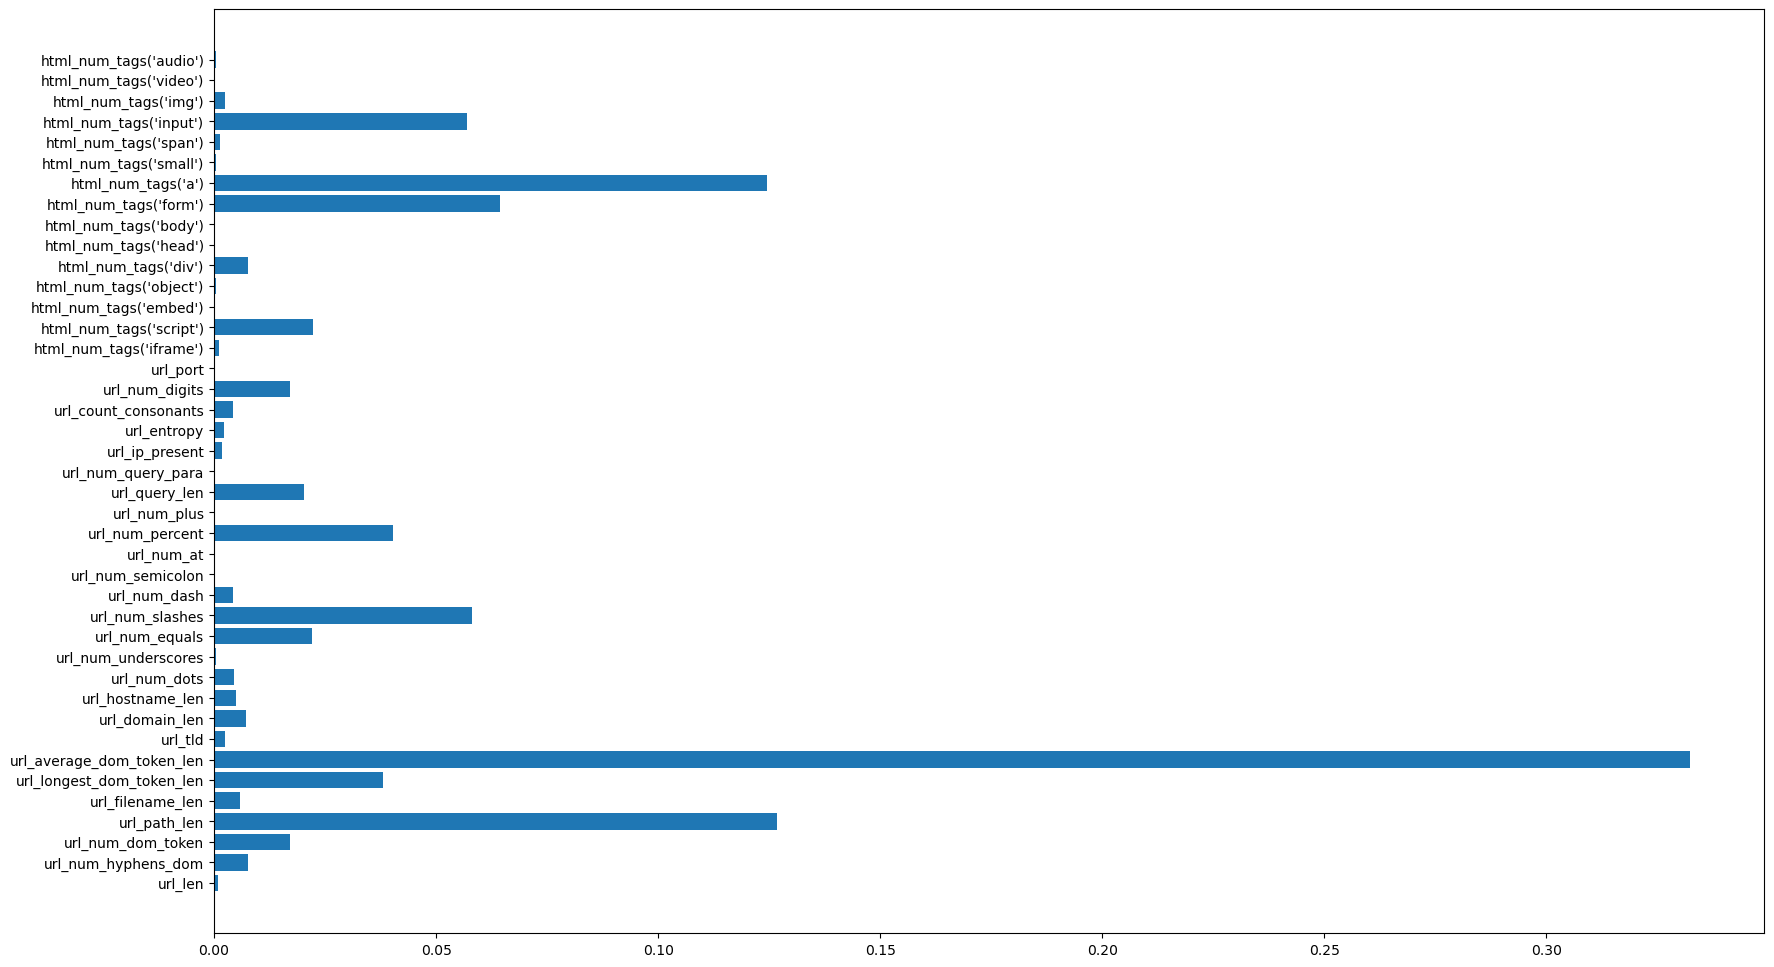

In [243]:
# 1. import
from sklearn.ensemble import GradientBoostingClassifier
# 2.선언
gbc = GradientBoostingClassifier()
# 3. fit()
gbc.fit(train_x,train_y)
# 3. predict()
gbc_pred = gbc.predict(val_x)
# train 및 val 데이터 정확도 확인 : score()
gbc.score(train_x, train_y), gbc.score(val_x,val_y)
#Confusion Matrix 확인
confusion = confusion_matrix(val_y, gbc_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)
# feature_importances_ 활용 Feature별 가중치 확인
plt.figure(figsize=(20,12))
plt.barh(y=train_df.columns[:-1],
        width = gbc.feature_importances_)
plt.show()

### AI모델 최적화

### <b>RandomForest GridSearchCV

In [244]:
from sklearn.model_selection import GridSearchCV

param_grid = [ {'n_estimators':[30,40,50,60,100], 'max_depth':[30,40,50,60,100]}]

rfc = RandomForestClassifier()

rfc_grid = GridSearchCV(rfc, 
                        param_grid, # 
                        cv=2, 
                        scoring='accuracy', # Classification일때  'accuracy','f1' ...
                                            # Regression 일때 'neg_mean_squared_error','r2'...
                        n_jobs=-1,          
                        verbose=1           # Log 출력 Level 조정
                       )

rfc_grid.fit(train_x, train_y)

rfc_model = rfc_grid.best_estimator_

print('최적의 파라미터 값 : ', rfc_grid.best_params_)
print('최고의 점수 : ', rfc_grid.best_score_)

In [245]:
rfc_grid_pred = rfc_model.predict(val_x)

# train 및 val 데이터 정확도
rfc_model.score(train_x, train_y), rfc_model.score(val_x, val_y)

(1.0, 0.9683060109289617)

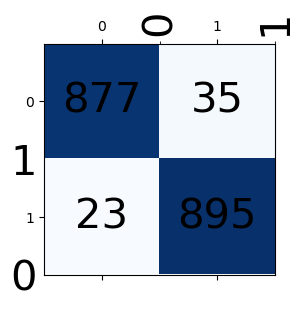

In [246]:
#Confusion Matrix
confusion = confusion_matrix(val_y, rfc_grid_pred)
fig, ax = plt.subplots(figsize=(10,3))
plot_confusion_matrix(ax, confusion, fontsize=30)

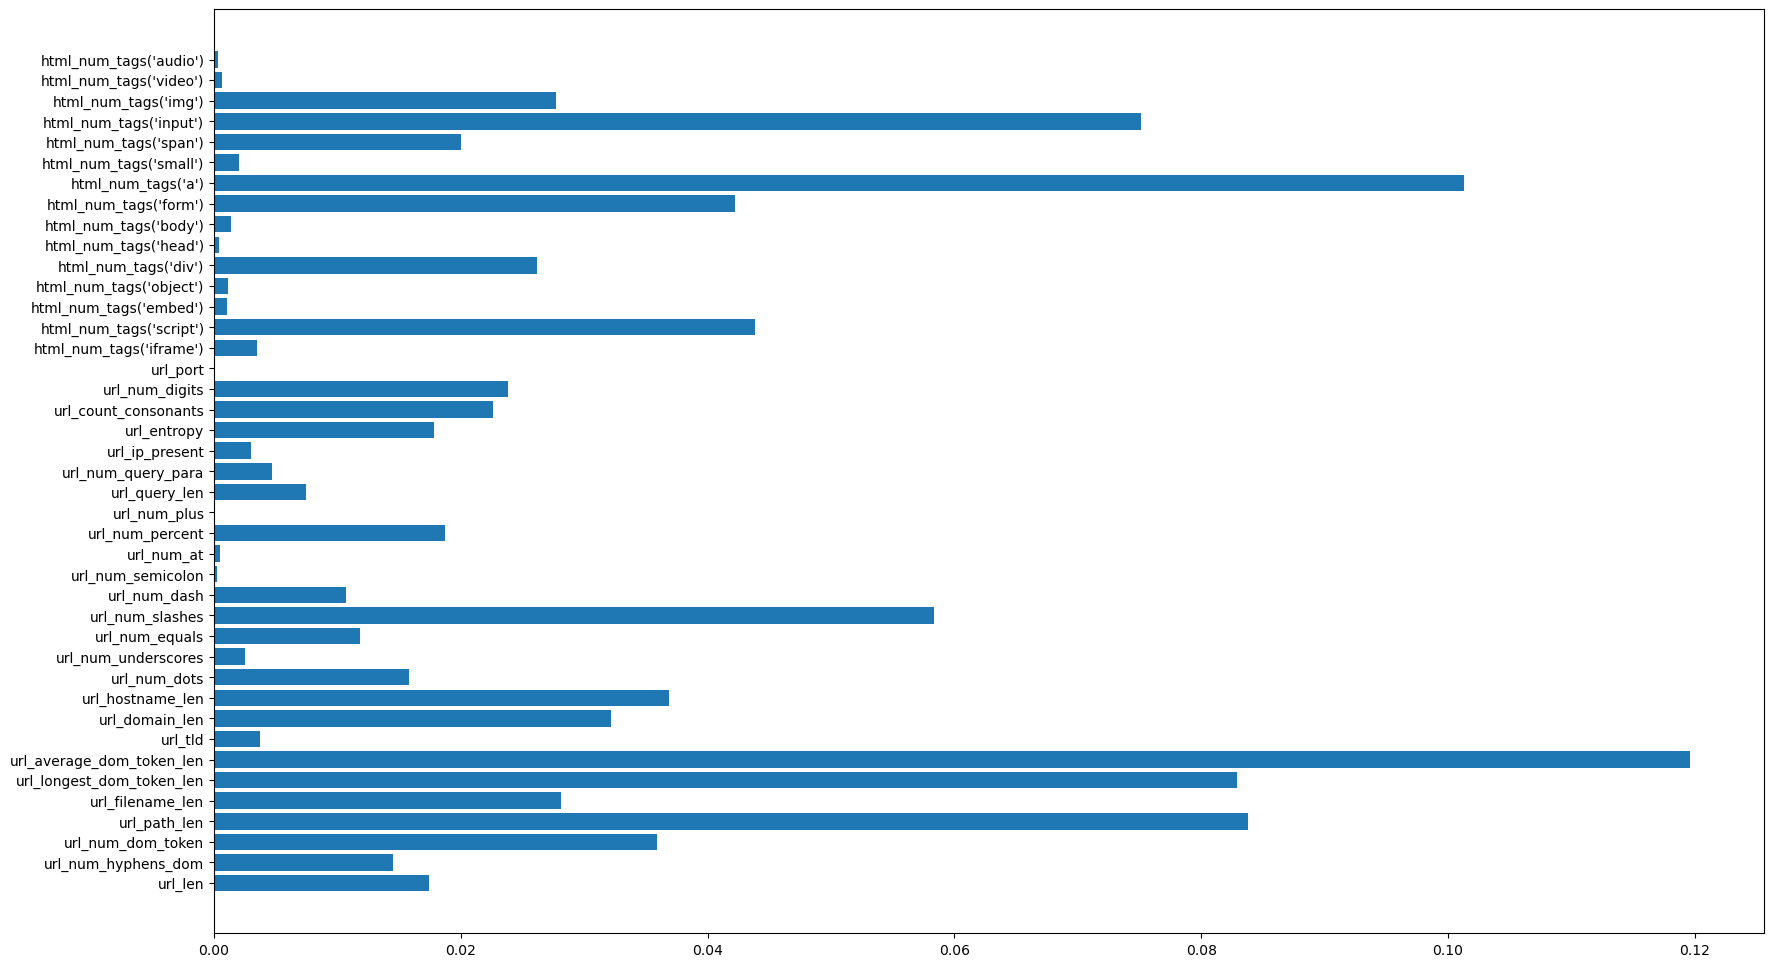

In [247]:
# feature_importances_ 활용 Feature별 가중치 확인
plt.figure(figsize=(20,12))
plt.barh(y=train_df.columns[:-1],
        width = rfc_model.feature_importances_)
plt.show()

In [248]:
train_df.columns

Index(['url_len', 'url_num_hyphens_dom', 'url_num_dom_token', 'url_path_len',
       'url_filename_len', 'url_longest_dom_token_len',
       'url_average_dom_token_len', 'url_tld', 'url_domain_len',
       'url_hostname_len', 'url_num_dots', 'url_num_underscores',
       'url_num_equals', 'url_num_slashes', 'url_num_dash',
       'url_num_semicolon', 'url_num_at', 'url_num_percent', 'url_num_plus',
       'url_query_len', 'url_num_query_para', 'url_ip_present', 'url_entropy',
       'url_count_consonants', 'url_num_digits', 'url_port',
       'html_num_tags('iframe')', 'html_num_tags('script')',
       'html_num_tags('embed')', 'html_num_tags('object')',
       'html_num_tags('div')', 'html_num_tags('head')',
       'html_num_tags('body')', 'html_num_tags('form')', 'html_num_tags('a')',
       'html_num_tags('small')', 'html_num_tags('span')',
       'html_num_tags('input')', 'html_num_tags('img')',
       'html_num_tags('video')', 'html_num_tags('audio')', 'Result_v1'],
      dtype='o

In [249]:
import joblib
#train_df.drop('Result_v1',axis=1,inplace=True)
# 학습 데이터에서 컬럼명 추출 (X가 DataFrame이어야 함)
feature_columns = train_df.columns.tolist()
print(len(feature_columns))
print(feature_columns)
joblib.dump(feature_columns, 'feature_columns.pkl')


['feature_columns.pkl']

In [250]:
#모델 저장
joblib.dump(rfc_model,'best_ml_model.pkl')

['best_ml_model.pkl']

### 모델 시뮬

In [251]:
simul = np.array([[]])  # -1 ~ 1 사이로 변환된 타깃값을 제외한 입력값들이 들어가야함

In [ ]:
import pandas as pd
import joblib

# 모델 및 피처 목록 불러오기
ml_model = joblib.load('best_ml_model.pkl')
model_features = joblib.load('feature_columns.pkl')  # 정확히 41개
model_features = [col for col in model_features if col != 'Result_v1']

# CSV 불러오기
df = pd.read_csv('Feature Website HTML Processed.csv')

# 라벨 컬럼 제거
for label_col in ['Unnamed: 0','Result_v1', 'repu',"html_num_tags('applet')"]:
    if label_col in df.columns:
        df = df.drop(columns=[label_col])


# 누락된 컬럼 0으로 추가
for col in model_features:
    if col not in df.columns:
        df[col] = 0

# 1. model_features에 없는 컬럼 찾기
extra_cols = [col for col in df.columns if col not in model_features]
# 2. 없애야 할 컬럼 출력
if extra_cols:
    print("다음 컬럼은 제거됩니다:", extra_cols)
    

# 불필요한 컬럼 제거 (model_features에 없는 컬럼)
df = df.drop(columns=extra_cols, axis=1)  # ✅ 정확한 순서로 41개 컬럼만 유지

# 샘플 선택
simul = df.sample(n=1, random_state=None)

# 디버깅용 출력
print(f"모델 기대 피처 수: {ml_model.n_features_in_}")
print(f"입력 샘플 피처 수: {simul.shape[1]}")

# 예측 수행
res = ml_model.predict(simul)

# 결과 출력
print("예측 결과:", res[0])  # 1: 정상, -1: 피싱



c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('small'),...,url_num_at,url_num_percent,url_num_plus,url_query_len,url_num_query_para,url_ip_present,url_entropy,url_count_consonants,url_num_digits,url_port
count,40.000000,40.000000,40.0,40.000000,40.000000,40.0,40.000000,40.000000,40.000000,40.000000,...,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0,40.0
mean,0.075000,7.050000,0.0,0.025000,17.800000,1.0,0.550000,0.475000,32.350000,0.250000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.266747,6.744228,0.0,0.158114,23.961722,0.0,0.503831,0.816104,53.051765,1.581139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.000000,1.000000,0.0,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.000000,4.500000,0.0,0.000000,3.500000,1.0,1.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.000000,12.250000,0.0,0.000000,28.250000,1.0,1.000000,1.000000,46.750000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.000000,20.000000,0.0,1.000000,89.000000,1.0,1.000000,3.000000,198.000000,10.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
